<a href="https://colab.research.google.com/github/PabloAMC/fast_ai_practice/blob/main/Exercise_1_Oxford_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Classification of images

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import libraries and so on

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
import pandas as pd

In [ ]:
bs = 64 # <PARAM>

## Loading the data

Let us first look at URLs. We choose from https://course.fast.ai/datasets

In [ ]:
path = untar_data(URLs.FLOWERS) ; path

PosixPath('/root/.fastai/data/oxford-102-flowers')

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-102-flowers/valid.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/models'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/test.txt'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/train.txt')]

In [ ]:
path_img = path/'jpg'

In [ ]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_07321.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_03726.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_07608.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_02320.jpg'),
 PosixPath('/root/.fastai/data/oxford-102-flowers/jpg/image_04207.jpg')]

In [ ]:
train_df = pd.read_csv(path/'train.txt',header=None, sep = ' ')
train_len = len(train_df) 
train_df.head()

valid_df = pd.read_csv(path/'valid.txt',header=None, sep = ' ')
valid_len = len(valid_df)
valid_df.head()

frames = [train_df, valid_df]
df = pd.concat(frames)
df.head()

,0,1
0,jpg/image_03860.jpg,16
1,jpg/image_06092.jpg,13
2,jpg/image_02400.jpg,42
3,jpg/image_02852.jpg,55
4,jpg/image_07710.jpg,96


In [ ]:
data = (ImageList.from_df(df=df, path=path) #Where to find the data? -> in path and its subfolders
        .split_by_idxs(train_idx = range(train_len), valid_idx = range(train_len, train_len + valid_len))              #How to split in train/valid? -> use the indices
        .label_from_df()            #How to label? -> depending on the folder of the filenames
        #.add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(size=224)       #Data augmentation? -> use tfms with a size of 64
        .databunch())
data.batch_size = bs

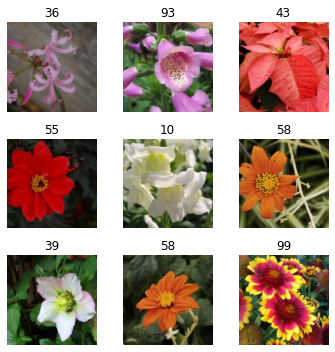

In [ ]:
data.show_batch(rows=3, figsize=(5,5))
#data.classes

## Model training and interpretation

In [ ]:
learn = cnn_learner(
    data,
    models.resnet34,
    metrics=error_rate
)

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,6.032403,3.864798,0.856863,00:40
1,3.986343,1.409886,0.324510,00:40
2,2.526850,1.034532,0.242157,00:40
3,1.715130,0.955530,0.221569,00:40
4,1.228234,0.949364,0.215686,00:40


In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

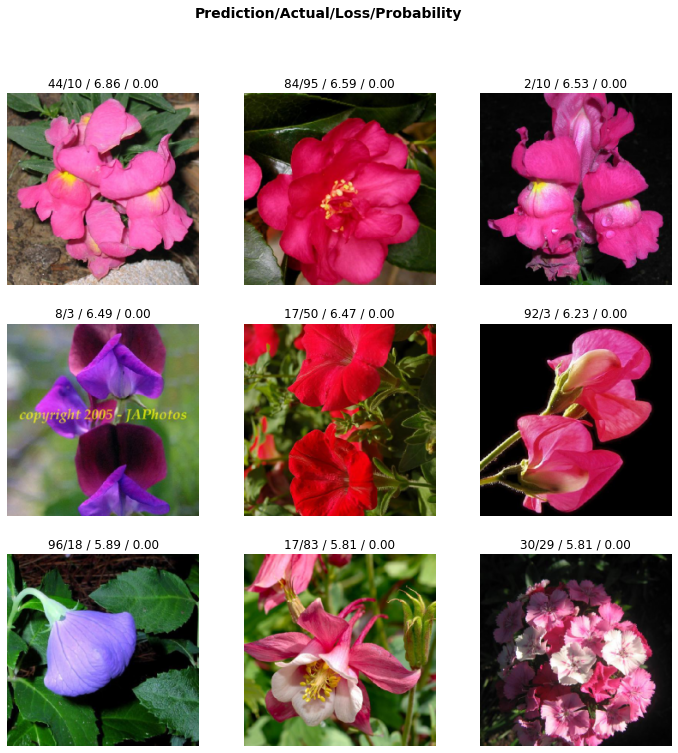

In [ ]:
interp.plot_top_losses(9)

In [ ]:
#interp.plot_confusion_matrix()

In [ ]:
interp.most_confused(min_val=2)

[(3, 8, 3),
 (6, 35, 2),
 (12, 28, 2),
 (25, 89, 2),
 (29, 30, 2),
 (30, 21, 2),
 (33, 85, 2),
 (38, 77, 2),
 (38, 92, 2),
 (42, 71, 2),
 (71, 89, 2),
 (77, 6, 2),
 (81, 71, 2),
 (89, 82, 2)]

## Fine tunning

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


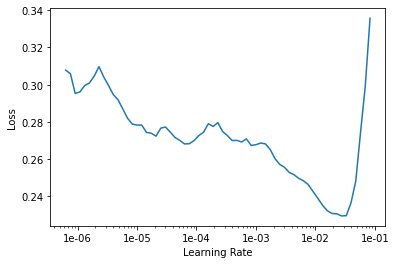

In [ ]:
learn.recorder.plot()

In [ ]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1020 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
16,13,42,55,96
Path: /root/.fastai/data/oxford-102-flowers;

Valid: LabelList (1020 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
89,44,4,34,79
Path: /root/.fastai/data/oxford-102-flowers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, 

In [ ]:
learn.unfreeze()

In [ ]:
lr = 1e-2
learn.fit_one_cycle(5, slice(3e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.583155,2.423525,0.568627,00:40
1,1.466536,15.080836,0.900980,00:40
2,1.686927,4.029154,0.627451,00:39
3,1.355119,1.322677,0.340196,00:39
4,0.990182,0.901633,0.242157,00:40


In [ ]:
learn.save('stage-2')

## Greter resolution

In [ ]:
data = (ImageList.from_df(df=df, path=path) #Where to find the data? -> in path and its subfolders
        .split_by_idxs(train_idx = range(train_len), valid_idx = range(train_len, train_len + valid_len))              #How to split in train/valid? -> use the indices
        .label_from_df()            #How to label? -> depending on the folder of the filenames
        #.add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(size=512)       #Data augmentation? -> use tfms with a size of 64
        .databunch())

In [ ]:
learn.data = data

In [ ]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


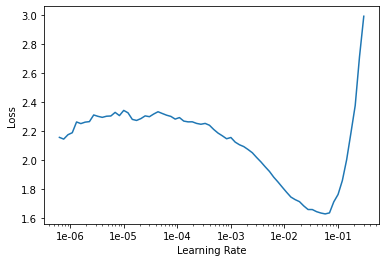

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,2.122947,1.846156,0.431373,00:51
1,1.701612,1.300248,0.316667,00:51
2,1.327224,1.170259,0.294118,00:50
3,1.055513,1.108941,0.263725,00:51
4,0.872486,1.099419,0.264706,00:51


In [ ]:
learn.save('stage-1-512')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.504116,0.949007,0.230392,00:51
1,0.374245,0.887200,0.223529,00:51
2,0.286372,0.769464,0.183333,00:50
3,0.209870,0.700940,0.168627,00:51
4,0.159324,0.681337,0.163725,00:50


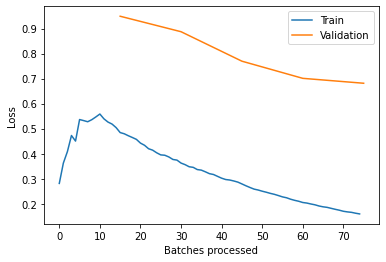

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('stage-2-512')

## Resnet 50

In [ ]:
data = (ImageList.from_df(df=df, path=path) #Where to find the data? -> in path and its subfolders
        .split_by_idxs(train_idx = range(train_len), valid_idx = range(train_len, train_len + valid_len))              #How to split in train/valid? -> use the indices
        .label_from_df()            #How to label? -> depending on the folder of the filenames
        #.add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(size=224)       #Data augmentation? -> use tfms with a size of 64
        .databunch())
data.batch_size = bs

In [ ]:
learn = cnn_learner(
    data,
    models.resnet50,
    metrics=error_rate
)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,5.190991,2.261593,0.522549,00:39
1,2.756635,0.952101,0.252941,00:38
2,1.691082,0.848425,0.213725,00:38
3,1.111689,0.783668,0.204902,00:39
4,0.766281,0.773586,0.200980,00:38


In [ ]:
learn.save('resnet50-stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

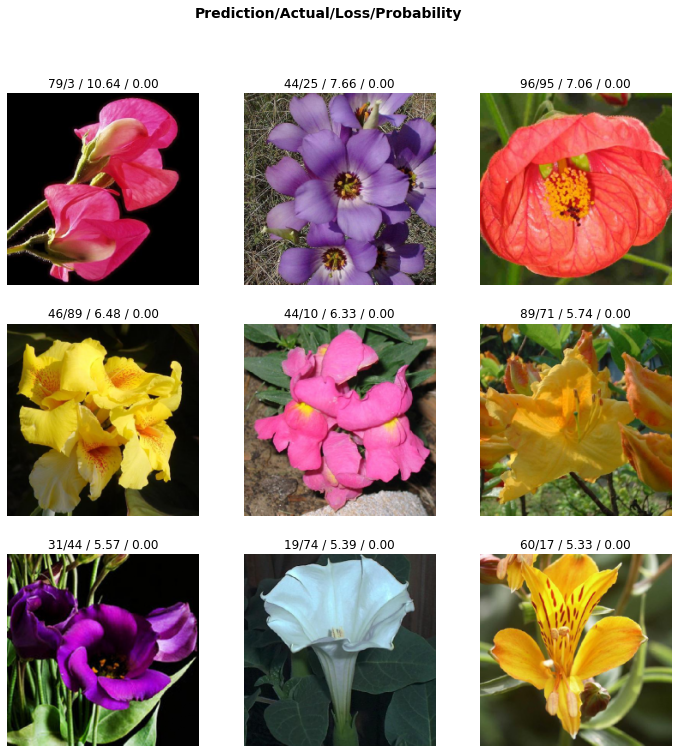

In [ ]:
interp.plot_top_losses(9)

In [ ]:
#interp.plot_confusion_matrix()

In [ ]:
interp.most_confused(min_val=2)

[(10, 3, 2),
 (10, 44, 2),
 (15, 47, 2),
 (38, 77, 2),
 (38, 87, 2),
 (38, 92, 2),
 (67, 42, 2),
 (75, 74, 2),
 (81, 18, 2),
 (81, 68, 2),
 (82, 69, 2),
 (83, 68, 2),
 (100, 10, 2),
 (100, 45, 2)]

## Fine tunning

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


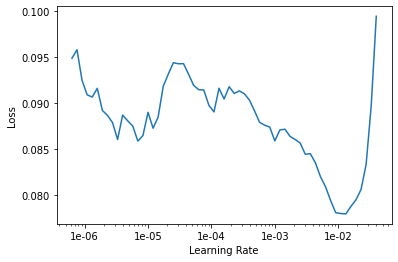

In [ ]:
learn.recorder.plot()

In [ ]:
learn.load('resnet50-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1020 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
16,13,42,55,96
Path: /root/.fastai/data/oxford-102-flowers;

Valid: LabelList (1020 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
89,44,4,34,79
Path: /root/.fastai/data/oxford-102-flowers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [ ]:
learn.unfreeze()

In [ ]:
lr = 1e-2
learn.fit_one_cycle(5, slice(3e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.619356,3.201042,0.620588,00:40
1,2.030396,177.698807,0.977451,00:40
2,2.193667,4.313083,0.661765,00:39
3,1.753346,1.101008,0.289216,00:39
4,1.296183,0.895819,0.217647,00:40


In [ ]:
learn.save('resnet50-stage-2')

## Resnet 50 fine tunning

In [ ]:
data = (ImageList.from_df(df=df, path=path) #Where to find the data? -> in path and its subfolders
        .split_by_idxs(train_idx = range(train_len), valid_idx = range(train_len, train_len + valid_len))              #How to split in train/valid? -> use the indices
        .label_from_df()            #How to label? -> depending on the folder of the filenames
        #.add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(size=512)       #Data augmentation? -> use tfms with a size of 64
        .databunch())
data.batch_size = 8

In [ ]:
learn.data = data

In [ ]:
learn.freeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


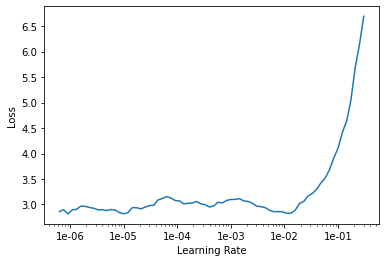

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,2.595834,2.465946,0.408824,00:58
1,2.238197,2.093193,0.386275,00:56
2,1.754703,1.890051,0.322549,00:57
3,1.209468,1.153508,0.274510,00:56
4,0.901977,1.145267,0.263725,00:56


In [ ]:
learn.save('resnet50-stage-1-512')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.953865,1.080980,0.257843,01:02
1,1.385435,1.625679,0.331373,01:00
2,0.894877,1.072717,0.237255,00:59
3,0.409476,0.805504,0.179412,00:59
4,0.271934,0.770369,0.172549,00:59


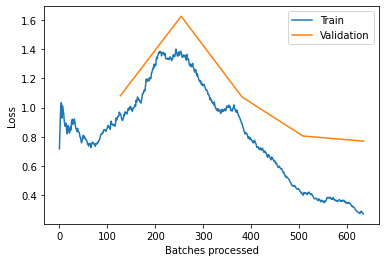

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('resnet50-stage-2-512')